Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:чйв


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки</font>
* Очень интересная и полезная статья: https://dyakonov.org/2021/05/27/imbalance/

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, мне было интересно ее проверять
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
- Есть маленькие недочеты, но думаю ты быстро и легко их поправишь
- Жду обновленную работу


<div class="alert alert-block alert-info">
<b>Ревьювер: </b> Привет, ты мне прислал пустую работу без моих комментариекв, возможно, ты ошибся с версией?

Привет. Я не получил комментариев в первый раз. Когда открыл работу из браузера, у меня подгрузилась пустая версия. Подумал, что произошла ошибка и моя работа не подгрузилась. Это подтверждает и то, что мою работу очень быстро проверили за 30 мин. Хотя обычно за несколько часов. 

Посмотри пожалуйста, может мне просто пришла версия без коментов.

<div class="alert alert-block alert-info">
<b>Ревьювер: </b> Проблем нет - сейчас проверю, вина платформы наверное) Но 30 минут вполне достаточно времени, чтобы нормально проверить работу, поэтому не волнуйся)

# Yandex project: 7 отток клиентов из Банка

Отток клиентов
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Параметры

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата


Целевой признак

1)Exited — факт ухода клиента


## Подготовка данных

Загрузите и подготовьте данные. 

Поясните порядок действий.

Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

Проведите финальное тестирование.


In [1]:
# правильнее использовать модели классификации, а не регрессии

#  Импортируем библиотеки 
import pandas as pd
import math
import matplotlib.pyplot as plt
from math import ceil
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#pip install sweetviz
#import sweetviz as sv

#  Импортируем модели
from sklearn.linear_model import LinearRegression # это регрессия, а нам нужна классификация
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import tree

# импортируем метрики
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# импортируем методы
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>


In [2]:
try:
    data = pd.read_csv("datasets_2_modul/Churn.csv")
except:
    data = pd.read_csv("/datasets/Churn.csv")

    
def show_parameters_df(data):
    data.info()
    
    display(data.describe())
    print("\n")
    data.columns
    display(data.head(35))
    

show_parameters_df(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший помощник
</div>


In [3]:
print(data.loc[data["Tenure"].isna()])

print(data["Tenure"].unique())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
30           31    15589475    Azikiwe          591     Spain  Female   39   
48           49    15766205        Yin          550   Germany    Male   38   
51           52    15768193  Trevisani          585   Germany    Male   36   
53           54    15702298   Parkhill          655   Germany    Male   41   
60           61    15651280     Hunter          742   Germany    Male   35   
...         ...         ...        ...          ...       ...     ...  ...   
9944       9945    15703923    Cameron          744   Germany    Male   41   
9956       9957    15707861      Nucci          520    France  Female   46   
9964       9965    15642785    Douglas          479    France    Male   34   
9985       9986    15586914     Nepean          659    France    Male   36   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

Приведем названия столбцов в змеином регистре

In [4]:
data = data.rename(columns = {"RowNumber" : "row_number", "CustomerId" : "customer_id", "Surname" : "surname", "CreditScore" : "credit_score",  "Geography" : "geography", "Gender" : "gender", "Age" : "age", "Tenure" : "tenure", "Balance" : "balance", "NumOfProducts" : "num_of_products", "HasCrCard" : "has_cr_card", "IsActiveMember" : "is_active_member", "EstimatedSalary" : "estimated_salary", "Exited" : "exited" })
                   

обработаем пропуски - заменим их средним значением

In [5]:
data["tenure"] = data['tenure'].fillna(ceil(data['tenure'].mean()))


<div class="alert alert-block alert-info"><b>Совет:</b> Пропуски проанализированы и решение заполнять их так - допустимое . Но мне кажется, что так как природа пропусков неизвестна можно заполнить их случайными числами, чтобы не влиять на распределение


In [6]:

'''def check_parameters_func(df):
    df["critic_score"].hist(bins = 100)
    plt.xlabel("critic_score")
    plt.ylabel("частота")
    plt.title("Частота распределения параметров critic_score")
    plt.show()
    
    df["user_score"].hist(bins = 100)
    plt.xlabel("user_score")
    plt.ylabel("частота")
    plt.title("Частота распределения параметров user_score")
    plt.show()
    return 0
'''    

'def check_parameters_func(df):\n    df["critic_score"].hist(bins = 100)\n    plt.xlabel("critic_score")\n    plt.ylabel("частота")\n    plt.title("Частота распределения параметров critic_score")\n    plt.show()\n    \n    df["user_score"].hist(bins = 100)\n    plt.xlabel("user_score")\n    plt.ylabel("частота")\n    plt.title("Частота распределения параметров user_score")\n    plt.show()\n    return 0\n'

Хочу создать функцию, которая будет выводить данные о данных

row_number


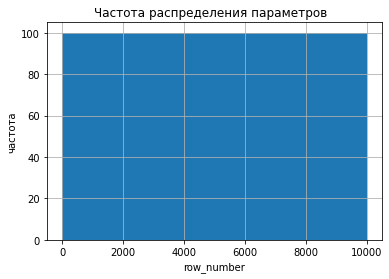

[    1     2     3 ...  9998  9999 10000]
2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    1
1338    1
2047    1
Name: row_number, Length: 10000, dtype: int64


customer_id


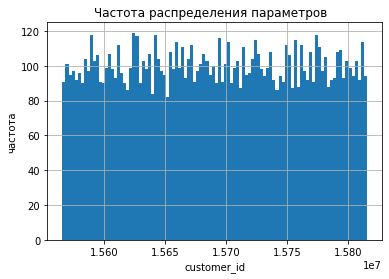

[15634602 15647311 15619304 ... 15584532 15682355 15628319]
15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: customer_id, Length: 10000, dtype: int64


surname


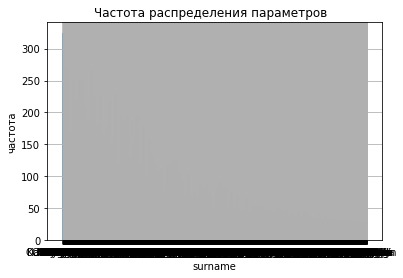

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Morrice        1
Diehl          1
Kenyon         1
Kolesnikov     1
Lacross        1
Name: surname, Length: 2932, dtype: int64


credit_score


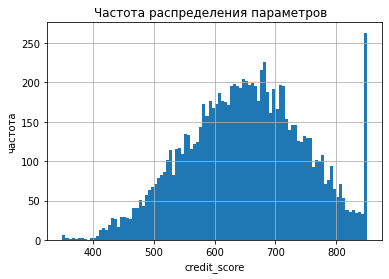

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

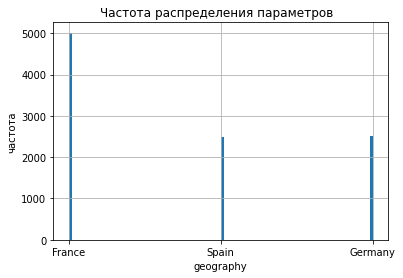

['France' 'Spain' 'Germany']
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64


gender


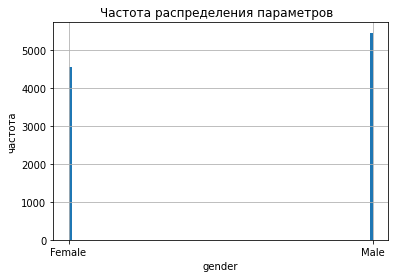

['Female' 'Male']
Male      5457
Female    4543
Name: gender, dtype: int64


age


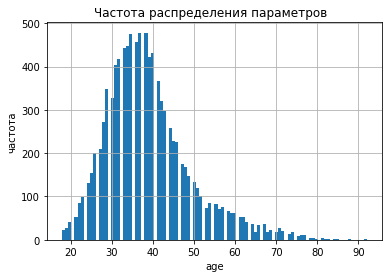

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64


tenure


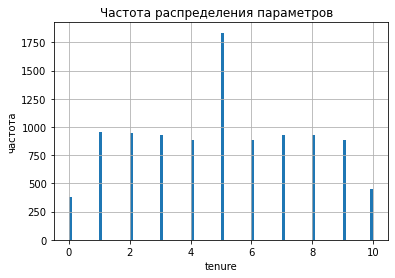

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]
5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: tenure, dtype: int64


balance


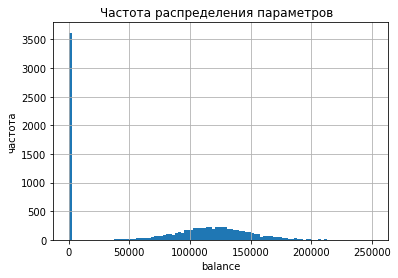

[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Name: balance, Length: 6382, dtype: int64


num_of_products


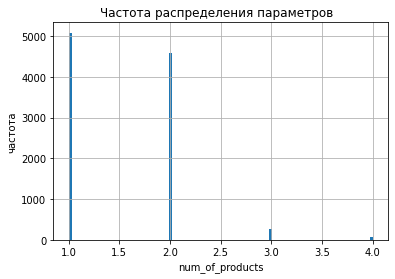

[1 3 2 4]
1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64


has_cr_card


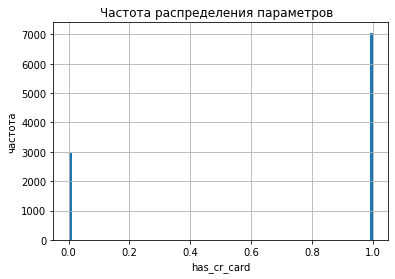

[1 0]
1    7055
0    2945
Name: has_cr_card, dtype: int64


is_active_member


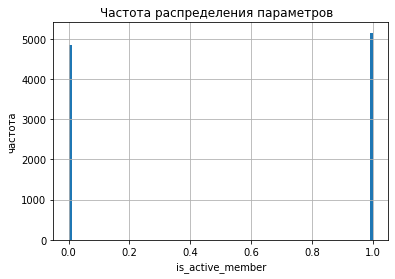

[1 0]
1    5151
0    4849
Name: is_active_member, dtype: int64


estimated_salary


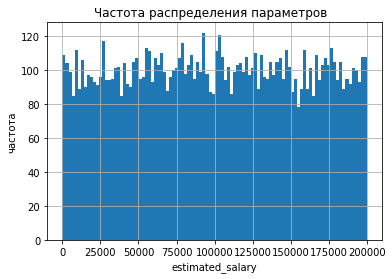

[101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
            ..
37674.47     1
158043.11    1
103792.53    1
182266.01    1
155061.97    1
Name: estimated_salary, Length: 9999, dtype: int64


exited


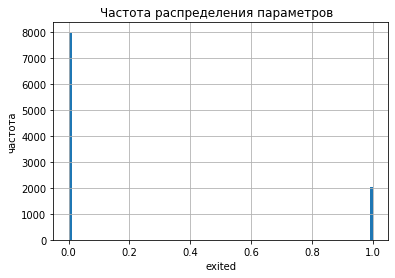

[1 0]
0    7963
1    2037
Name: exited, dtype: int64




In [7]:
def columns_info_from_df(df):
    for i in df.columns:
        
        print(i)
        df[i].hist(bins = 100)
       # df[i].plot(kind = "bar", figsize = (10,5))
        plt.xlabel(i)
        plt.ylabel("частота")
        plt.title("Частота распределения параметров  ")
        plt.show()
       
        print(data[i].unique())
        print(data[i].value_counts())

        print("\n")

columns_info_from_df(data)

## Вопрос: почему в гистограмме частота значений customer id варьируется, хотя это должен быть уникальный показатель? Для дальнейшего анализа это не очень важно, но все же 


<div class="alert alert-block alert-info"><b>Ответ:</b> Потому что гистограма показывает частоту распределения объектов, характерных для корзины, а в корзину попадет много объектов

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Понял спасибо.
</div>

Изменим тип данных в графе, сколько человек является клиентом банка на int, это улучшит прогноз модели и снизит размер

In [8]:
data["tenure"] = data["tenure"].astype(int)

Удалим уникальные значения, которые не дают информации для обучения модели

In [9]:
data = data.drop(['row_number','surname',"customer_id"] , axis=1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>


In [10]:
show_parameters_df(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Вывод:
* в данных есть пропуски в столбце Tenure. Логических замен найти не удалось - поэтому заменили средним
* Столбцы не в змеином регистре
* Столбцы фамилия - нам не нужно для обучения модели - они уникальные, и значит не будут влиять на прогноз
* Значения в столбце Tenure только целые, а тип с плавающей точкой
* Столбец rownumber тоже уникальный, его можно удалить
* Странно, что при всех уникальных значениях, гистограмма пишет что значений 100
* Интересно, что самый лучший показатель кредитного рейтинга встречается чаще всего



<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
    
    
    
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Подскажи, почему не получается. Я на домашней машине загрузил библиотеку sweetviz через pip и командную строку, а как подгрузить эту библиотеку в тренажер?
</div>

In [11]:
#report = sv.analyze([data, " Permit Logs"])
#report.show_html('common analysis.html')



## 2  Исследование задачи

Разделяем выборки не тестовую, тренировочную и валидационную

In [12]:
target = data['exited']
features = data.drop(['exited'] , axis=1)
show_parameters_df(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


Так как модель не может обучаться на поле objects. Заменим все нецифровые значения на цифровые методом прямого кодирования

In [13]:
features = pd.get_dummies(features, drop_first=True)

#features = pd.get_dummies(features["gender"], drop_first=True)
#print(pd.get_dummies(data["geography"], drop_first=True).head(5))#

show_parameters_df(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   geography_Germany  10000 non-null  uint8  
 9   geography_Spain    10000 non-null  uint8  
 10  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


<div class="alert alert-block alert-success">
<b>Успех:</b>  OHE - хороший выбор, применен корректно
</div>


Разделим на тестовую, тренировочную и валидационную выборку

In [14]:
features_else, features_test, target_else, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_else, target_else, test_size=0.25, random_state=12345)

Создадим функцию для подсчета параметров

In [15]:
def f1_and_other_parameters_func(model, target, predictions, features):
    
    f1 = f1_score(target, predictions)
    confusion_matrix1 =  confusion_matrix(y_true = target, y_pred = predictions  )
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)

    probabilities =  model.predict_proba(features)
    probabilities_ones = probabilities[:, 1]
    a_r = roc_auc_score(target , probabilities_ones)
   # print(type(probabilities))
   # print(probabilities)
  
    print("F1:", f1)
    print("AUC_ROC ", a_r)
    print("Матрица ошибок \n" , confusion_matrix1)
    tn, fp, fn, tp = confusion_matrix(y_true = target, y_pred = predictions).ravel()
    print("TN", tn)
    print("FP", fp)
    print("FN", fn)
    print("TP", tp)
    
    
    print("Точность ", precision)
    print("Полнота  ", recall)
    mse = mean_squared_error(target, predictions) 
    print("MSE ", mse)
    print("RMSE ", mse** 0.5)

    #AUC_ROC
    probabilities =  model.predict_proba(features)
    probabilities_ones = probabilities[:, 1]
    a_r = roc_auc_score(target , probabilities_ones)
    
    print("AUC_ROC", a_r)
    
    

    print('Кривая Precision-Recall \n')
    #probabilities_valid = model.predict_proba(features_valid)
    #precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
    probabilities = model.predict_proba(features)
    precision, recall, thresholds = precision_recall_curve(target, probabilities[:, 1])
    
    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show() 
    
    fpr, tpr, thresholds = roc_curve(target, probabilities_ones)
    
    print("FPR", fpr)
    print("TPR", tpr)  
    
    
    return 0



<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  ROC_AUC нужно считать от вероятносей 1-го класса. А слайс [0:1] дает нам объекты 0-го класса.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо поправил
</div>

Опробуем на 3х различных моделях
линейная регрессия не подходит для бинарной классификации

F1: 0.09389671361502347
AUC_ROC  0.6972997711670481
Матрица ошибок 
 [[1469   26]
 [ 360   20]]
TN 1469
FP 26
FN 360
TP 20
Точность  0.43478260869565216
Полнота   0.05263157894736842
MSE  0.20586666666666667
RMSE  0.4537253207246281
AUC_ROC 0.6972997711670481
Кривая Precision-Recall 



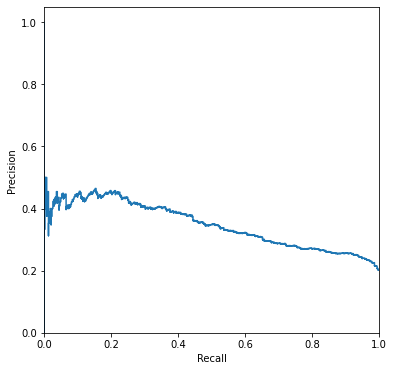

FPR [0.00000000e+00 6.68896321e-04 1.33779264e-03 1.33779264e-03
 2.00668896e-03 2.00668896e-03 3.34448161e-03 3.34448161e-03
 4.01337793e-03 4.01337793e-03 7.35785953e-03 7.35785953e-03
 8.02675585e-03 8.02675585e-03 1.00334448e-02 1.00334448e-02
 1.07023411e-02 1.07023411e-02 1.13712375e-02 1.13712375e-02
 1.20401338e-02 1.20401338e-02 1.40468227e-02 1.40468227e-02
 1.47157191e-02 1.47157191e-02 1.73913043e-02 1.73913043e-02
 1.80602007e-02 1.80602007e-02 1.93979933e-02 1.93979933e-02
 2.00668896e-02 2.00668896e-02 2.07357860e-02 2.07357860e-02
 2.54180602e-02 2.54180602e-02 2.60869565e-02 2.60869565e-02
 2.67558528e-02 2.67558528e-02 2.80936455e-02 2.80936455e-02
 2.87625418e-02 2.87625418e-02 2.94314381e-02 2.94314381e-02
 3.01003344e-02 3.01003344e-02 3.07692308e-02 3.07692308e-02
 3.14381271e-02 3.14381271e-02 3.27759197e-02 3.27759197e-02
 3.41137124e-02 3.41137124e-02 3.67892977e-02 3.67892977e-02
 3.81270903e-02 3.81270903e-02 4.01337793e-02 4.01337793e-02
 4.21404682e-02 4.21

0

In [16]:
# модель 1: Логистическая регрессия
model = LogisticRegression(random_state = 12345, solver = "liblinear")
model.fit(features_train, target_train) # обучим модель на тренировочной выборке
predictions_valid = model.predict(features_valid) 

f1_and_other_parameters_func(model, target_valid ,predictions_valid, features_valid)

F1 0.0
F1 0.5083713850837138
F1 0.42578125
F1 0.5421487603305785
F1 0.5584415584415585
 
F1 наилучшей модели 'дерево классификации': 0.5584415584415585
best_depth= 5
F1: 0.5584415584415585
AUC_ROC  0.8384465763069882
Матрица ошибок 
 [[1431   64]
 [ 208  172]]
TN 1431
FP 64
FN 208
TP 172
Точность  0.7288135593220338
Полнота   0.45263157894736844
MSE  0.14506666666666668
RMSE  0.3808761828556187
AUC_ROC 0.8384465763069882
Кривая Precision-Recall 



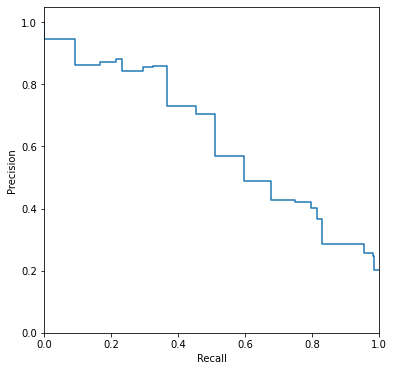

FPR [0.         0.00133779 0.00668896 0.00802676 0.00802676 0.01003344
 0.01404682 0.01404682 0.01538462 0.04280936 0.0541806  0.05618729
 0.11505017 0.17926421 0.25284281 0.25551839 0.27959866 0.30769231
 0.3632107  0.58862876 0.60869565 0.71772575 0.7638796  0.99866221
 1.        ]
TPR [0.         0.09210526 0.16578947 0.21578947 0.23157895 0.23157895
 0.29473684 0.32631579 0.36578947 0.45263158 0.51052632 0.51052632
 0.59736842 0.67631579 0.74473684 0.75       0.79736842 0.81578947
 0.83157895 0.93157895 0.95526316 0.98157895 0.98684211 0.99736842
 1.        ]


0

In [17]:
# Модель 2: Древо решений с разной глубиной
best_depth = None
best_model = None
best_predictions = None
best_f1 = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth) # обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train ) # обучите модель
    predictions = model.predict(features_valid) # получите предсказания модели
    f1 = f1_score(target_valid, predictions) # посчитайте качество модели 
    print('F1',f1)
    
    if f1 > best_f1:
        best_depth = depth
        best_model = model
        best_predictions = predictions
        best_f1 = f1
        
print(" \nF1 наилучшей модели 'дерево классификации':", best_f1)
print("best_depth=", best_depth )

f1_and_other_parameters_func(best_model, target_valid ,best_predictions, features_valid )


F1 0.0 est 10 depth 1
F1 0.18691588785046728 est 10 depth 2
F1 0.2318181818181818 est 10 depth 3
F1 0.42495126705653025 est 10 depth 4
F1 0.49820788530465965 est 10 depth 5
F1 0.47706422018348627 est 10 depth 6
F1 0.5274336283185841 est 10 depth 7
F1 0.5378151260504201 est 10 depth 8
F1 0.5369127516778524 est 10 depth 9
F1 0.544839255499154 est 10 depth 10
F1 0.0 est 20 depth 1
F1 0.1504854368932039 est 20 depth 2
F1 0.23529411764705885 est 20 depth 3
F1 0.4103585657370519 est 20 depth 4
F1 0.4872727272727273 est 20 depth 5
F1 0.5204991087344029 est 20 depth 6
F1 0.5498281786941581 est 20 depth 7
F1 0.5531197301854975 est 20 depth 8
F1 0.5506756756756757 est 20 depth 9
F1 0.5695142378559465 est 20 depth 10
F1 0.0 est 30 depth 1
F1 0.1372549019607843 est 30 depth 2
F1 0.23529411764705885 est 30 depth 3
F1 0.3975903614457831 est 30 depth 4
F1 0.4684014869888476 est 30 depth 5
F1 0.5257548845470693 est 30 depth 6
F1 0.537261698440208 est 30 depth 7
F1 0.5617597292724196 est 30 depth 8
F1 

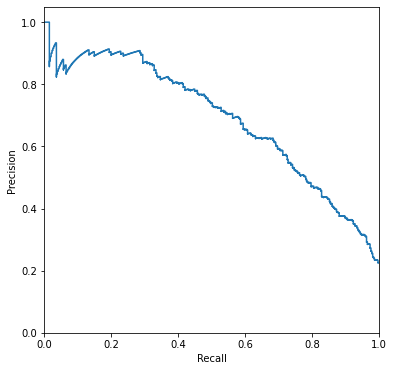

FPR [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.68896321e-04
 6.68896321e-04 2.00668896e-03 2.00668896e-03 2.67558528e-03
 2.67558528e-03 3.34448161e-03 3.34448161e-03 4.01337793e-03
 4.01337793e-03 4.68227425e-03 4.68227425e-03 5.35117057e-03
 5.35117057e-03 6.02006689e-03 6.02006689e-03 6.68896321e-03
 6.68896321e-03 7.35785953e-03 7.35785953e-03 8.02675585e-03
 8.02675585e-03 8.69565217e-03 8.69565217e-03 1.13712375e-02
 1.13712375e-02 1.20401338e-02 1.20401338e-02 1.27090301e-02
 1.27090301e-02 1.33779264e-02 1.33779264e-02 1.53846154e-02
 1.53846154e-02 1.67224080e-02 1.67224080e-02 1.80602007e-02
 1.80602007e-02 1.87290970e-02 1.87290970e-02 2.00668896e-02
 2.00668896e-02 2.07357860e-02 2.07357860e-02 2.14046823e-02
 2.14046823e-02 2.20735786e-02 2.20735786e-02 2.27424749e-02
 2.27424749e-02 2.40802676e-02 2.40802676e-02 2.47491639e-02
 2.47491639e-02 2.54180602e-02 2.54180602e-02 2.60869565e-02
 2.60869565e-02 2.80936455e-02 2.80936455e-02 3.01003344e-02
 3.01003344e-02 3.07

0

In [18]:
# Модель 3: Случайный лес с резной глубиной и EST

best_depth = None
best_model = None
best_predictions = None
best_f1 = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid) 
        f1 = f1_score(target_valid , predictions_valid)
        print("F1", f1, "est", est, "depth", depth)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_depth = depth
            best_predictions = predictions_valid

print(" \nF1 наилучшей модели случайного леса:", best_f1)
print("Лучшая глубина ", best_depth)
print("Лучшая показатель est" , best_est)

f1_and_other_parameters_func(best_model, target_valid ,best_predictions, features_valid )

        

# Выводы
* Лучший показатель у модели леса с показателем f1 = 0.57 при глубине = 9 и показателю est = 30

<div class="alert alert-block alert-success">
<b>Успех:</b>  Шаг сделан хорошо, но нужно будет обновить
</div>


## 3 Борьба с дисбалансом

Попробуем разными способам избавится от дисбаланса 2мя разными способами 

Увеличим выборку и проверим модели заново 

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [20]:
# я сначала увеличил выборку "1" в 10 раз в итоге, f1 получалась не более 0.54. И получил опять дисбаланс в другую сторону
# Потом понял, что баланс классов значит сделать так, чтобы количество 1 и 0 в обучающей выборке было одинаково. 
# для этого нужно проверить изначально, сколько 0 и 1 и только потом домножать на число, чтобы их количество было равно

print(target.value_counts())
# число 0 около 8000, а число 1 около 2000, поэтому умножаем в 4 раза

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

0    7963
1    2037
Name: exited, dtype: int64


<div class="alert alert-block alert-success">
<b>Успех:</b> Ты правильно все сделал. Подбирать эти значения неправильно, нам нужно просто устранить дисбаланс

In [21]:
# проверяем данные на 3х моделях

In [22]:
# Модель 1: Логистическая регрессия upsampling
model = LogisticRegression(random_state = 12345, solver = "liblinear")
model.fit(features_upsampled, target_upsampled)
predictions_valid_upsampled = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid_upsampled)


probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

# мне нужно обучать показатель на валидационной выборке, а не на тренировочной. Поэтому мы не гupsampled параметры берем
'''
probabilities =  model.predict_proba(features_upsampled)
probabilities_ones = probabilities[:, 0:1]
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_upsampled , probabilities_ones)
'''
print("F1     ", f1)
print("AUC_ROC", a_r)


F1      0.45198675496688745
AUC_ROC 0.7381270903010034


In [23]:
# Модель 2: Древо решений с глубиной = 5, upsampling
model = DecisionTreeClassifier(random_state=12345, max_depth= 5) 
model.fit(features_upsampled, target_upsampled)
predictions_upsampled_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_upsampled_valid)

probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

print("F1     ", f1)
print("AUC_ROC", a_r)

F1      0.5556544968833482
AUC_ROC 0.8376333392008448


In [24]:
# Модель 3: Случайный лес с глубиной 9 и EST = 30, upsampling
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=9)
model.fit(features_upsampled, target_upsampled)
predictions_upsampled_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_upsampled_valid)  

probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

print("F1     ", f1)
print("AUC_ROC", a_r)

F1      0.6228373702422144
AUC_ROC 0.8658053159654989


In [25]:
# Проверим уменьшение выборки

In [26]:
def downsample(features, target, fraction):
    
    feature_zeros = features[target == 0]
    feature_ones  = features[target == 1]
    target_zeros  = target[target == 0]
    target_ones   = target[target == 1]
    
    features_downsampled = pd.concat(
        [feature_zeros.sample(frac = fraction, random_state = 12345)] + [feature_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac = fraction, random_state=12345)] + [target_ones])
                    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    
    
    return features_downsampled, target_downsampled

In [27]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [28]:
# Модель 1: Логистическая регрессия, downsampling
model = LogisticRegression(random_state = 12345, solver = "liblinear")
model.fit(features_downsampled, target_downsampled)
predictions_downsampled_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_downsampled_valid)

probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

print("F1     ", f1)
print("AUC_ROC", a_r)

F1      0.45220282626766417
AUC_ROC 0.7382679105791233


In [29]:
# Модель 2: Древо решений с глубиной = 5, downsampling
model = DecisionTreeClassifier(random_state=12345, max_depth= 5)
model.fit(features_downsampled, target_downsampled)
predictions_downsampled_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_downsampled_valid)

probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

print("F1     ", f1)
print("AUC_ROC", a_r)

F1      0.5466417910447762
AUC_ROC 0.8362656222496039


In [30]:
# Модель 3: Случайный лес с глубиной 9 и EST = 30, downsampling
model = RandomForestClassifier(random_state = 12345, n_estimators = 30, max_depth = 9)
model.fit(features_downsampled, target_downsampled)
predictions_downsampled_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_downsampled_valid)

probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)

print("F1     ", f1)
print("AUC_ROC", a_r)

F1      0.5970149253731344
AUC_ROC 0.863759021299067


### Выводы:
* Снижение размерности показало лучшие результаты метрики f1, чем увеличение размерности для Дерева решений и для леса
* Наилучшие результаты показал метод случайного леса при увеличении и снижении размерности. При снижении размерности результат f1 на валидационной выборке лучше всех, поэтому будет использовать этот метод 

<div class="alert alert-block alert-success">
<b>Успех:</b> Отличная работа с моделями машинного обучения.  Радует достаточное количество расмотренных методов для борьбы с дисбалансом. 

<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  ROC_AUC - та же ошибка
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо, поправил
</div>

## 4 Тестирование модели

Cоздадим функцию, которая будет оражать метрики F1 и AUC_ROC

In [31]:
def f1_auc_roc_valid_test(model, features_valid, target_valid, features_test):
   
    # ошибка была в том, что модель внутри функции настраивалась на валидационных данных, а должна на тренировочных 
    # model.fit(features_valid, target_valid)
    predictions_valid = model.predict(features_valid)
    predictions_test = model.predict(features_test)
    
    print("Функция f1_auc_roc_valid_test")
    #F1
    f1 = f1_score(target_valid, predictions_valid)
    print("F1 валидационная", f1)
    f1 = f1_score(target_test, predictions_test)
    print("F1 тестовая     ", f1)

    # Auc-roc
    print("")
    probabilities =  model.predict_proba(features_valid)
    probabilities_ones = probabilities[:, 1]
    a_r = roc_auc_score(target_valid , probabilities_ones)
    print("AUC-ROC валидационная", a_r)
    probabilities =  model.predict_proba(features_test)
    probabilities_ones = probabilities[:, 1]
    a_r = roc_auc_score(target_test , probabilities_ones)
    print("AUC-ROC тестовая     ", a_r)

    
  #  return 0

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> <br> 1) Та же ошибка с ROC_AUC <br> 2) Нам в шаге с тестированием не нужно использовать валидационну выборка вообще никак, мы с ней работаем до тестирования - исследуем различные подходы, модели и гиперпараметры - находим наилучший набор. И для ОДНОЙ наилучшей настроенной модели проводим тестирование (на тестовой выборке получаем метрики)
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 1) Поправил
    2) 
</div>

In [33]:
# Модель 1: Логистическая регрессия
print("Модель 1: Логистическая регрессия")
model = LogisticRegression(random_state = 12345, solver = "liblinear")

print("Без балансировки")
model.fit(features_train, target_train) # обучим модель на тренировочной выборке
#predictions_valid = model.predict(features_valid) 
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

'''
print("Не функция")
model.fit(features_valid, target_valid)
predictions_valid = model.predict(features_valid)
predictions_test = model.predict(features_test)

#F1
f1 = f1_score(target_valid, predictions_valid)
print("F1 валидационная", f1)
f1 = f1_score(target_test, predictions_test)
print("F1 тестовая", f1)

# Auc-roc
print("")
probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 0:1]
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)
print("AUC-ROC валидационная", a_r)
probabilities =  model.predict_proba(features_test)
probabilities_ones = probabilities[:, 0:1]
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_test , probabilities_ones)
print("AUC-ROC тестовая", a_r)
'''


print("\n Увеличение размерности")
model.fit(features_upsampled, target_upsampled)
#predictions_upsampled_valid = model.predict(features_valid)
#predictions_upsampled_test = model.predict(features_test)

f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

'''
print("Не Функция")
#F1
f1 = f1_score(target_valid, predictions_upsampled_valid)
print("F1 валидационная", f1)
f1 = f1_score(target_test, predictions_upsampled_test)
print("F1 тестовая", f1)

# Auc-roc
print("")
probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 0:1]
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_valid , probabilities_ones)
print("AUC-ROC валидационная", a_r)
probabilities =  model.predict_proba(features_test)
probabilities_ones = probabilities[:, 0:1]
probabilities_ones = probabilities[:, 1]
a_r = roc_auc_score(target_test , probabilities_ones)
print("AUC-ROC тестовая", a_r)
'''

print("\n Снижение размерности")
model.fit(features_downsampled, target_downsampled)
predictions_downsampled_valid = model.predict(features_valid)
predictions_downsampled_test = model.predict(features_test)

f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

#model.fit(features_valid, target_valid)
#predictions_valid = model.predict(features_valid)
#predictions_test = model.predict(features_test)
'''
print("Не Функция")
#F1
f1 = f1_score(target_valid, predictions_downsampled_valid)
print("F1 валидационная", f1)
f1 = f1_score(target_test, predictions_downsampled_test)
print("F1 тестовая", f1)
# Auc-roc
print("")
probabilities =  model.predict_proba(features_valid)
probabilities_ones = probabilities[:, 0:1]
a_r = roc_auc_score(target_valid , probabilities_ones)
print("AUC-ROC валидационная", a_r)
probabilities =  model.predict_proba(features_test)
probabilities_ones = probabilities[:, 0:1]
a_r = roc_auc_score(target_test , probabilities_ones)
print("AUC-ROC тестовая", a_r)
'''

Модель 1: Логистическая регрессия
Без балансировки
Функция f1_auc_roc_valid_test
F1 валидационная 0.09389671361502347
F1 тестовая      0.09075630252100841

AUC-ROC валидационная 0.6972997711670481
AUC-ROC тестовая      0.6736895674300254

 Увеличение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.45198675496688745
F1 тестовая      0.452760736196319

AUC-ROC валидационная 0.7381270903010034
AUC-ROC тестовая      0.712945708782193

 Снижение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.45220282626766417
F1 тестовая      0.4497843499691928

AUC-ROC валидационная 0.7382679105791233
AUC-ROC тестовая      0.7101433973032746


'\nprint("Не Функция")\n#F1\nf1 = f1_score(target_valid, predictions_downsampled_valid)\nprint("F1 валидационная", f1)\nf1 = f1_score(target_test, predictions_downsampled_test)\nprint("F1 тестовая", f1)\n# Auc-roc\nprint("")\nprobabilities =  model.predict_proba(features_valid)\nprobabilities_ones = probabilities[:, 0:1]\na_r = roc_auc_score(target_valid , probabilities_ones)\nprint("AUC-ROC валидационная", a_r)\nprobabilities =  model.predict_proba(features_test)\nprobabilities_ones = probabilities[:, 0:1]\na_r = roc_auc_score(target_test , probabilities_ones)\nprint("AUC-ROC тестовая", a_r)\n'

In [34]:
# Модель 2: Древо решений с глубиной = 5
model = DecisionTreeClassifier(random_state=12345, max_depth= 5)
print("Модель 2: Древо решений с глубиной = 5")

print("Без балансировки")
model.fit(features_valid, target_valid)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

print("\n Увеличение размерности")
model.fit(features_upsampled, target_upsampled)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

print("\n Снижение размерности")
model.fit(features_downsampled, target_downsampled)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)


Модель 2: Древо решений с глубиной = 5
Без балансировки
Функция f1_auc_roc_valid_test
F1 валидационная 0.548951048951049
F1 тестовая      0.5013054830287206

AUC-ROC валидационная 0.8652314733321599
AUC-ROC тестовая      0.8221554778721077

 Увеличение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.5556544968833482
F1 тестовая      0.58

AUC-ROC валидационная 0.8376333392008448
AUC-ROC тестовая      0.8405792965684525

 Снижение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.5466417910447762
F1 тестовая      0.5971830985915493

AUC-ROC валидационная 0.8362656222496039
AUC-ROC тестовая      0.8409107987919432


In [35]:
# Модель 3: Случайный лес с глубиной 9 и EST = 30
model = RandomForestClassifier(random_state = 12345, n_estimators = 30, max_depth = 9)
print("Модель 3: Случайный лес с глубиной 9 и EST = 30")

print("Без балансировки")
model.fit(features_valid, target_valid)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

print("\n Увеличение размерности")
model.fit(features_upsampled, target_upsampled)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)

print("\n Снижение размерности")
model.fit(features_downsampled, target_downsampled)
f1_auc_roc_valid_test(model, features_valid, target_valid, features_test)


Модель 3: Случайный лес с глубиной 9 и EST = 30
Без балансировки
Функция f1_auc_roc_valid_test
F1 валидационная 0.7697262479871175
F1 тестовая      0.5178791615289765

AUC-ROC валидационная 0.9806108079563458
AUC-ROC тестовая      0.8502137880193098

 Увеличение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.6228373702422144
F1 тестовая      0.629881154499151

AUC-ROC валидационная 0.8658053159654989
AUC-ROC тестовая      0.8570012603743073

 Снижение размерности
Функция f1_auc_roc_valid_test
F1 валидационная 0.5970149253731344
F1 тестовая      0.6115581565471836

AUC-ROC валидационная 0.863759021299067
AUC-ROC тестовая      0.850428289458039


Лучшая тестовая модель - модель случайного леса. Проверим показатели на этой можели на тестовой выборке

Модель 3: Случайный лес с глубиной 9 и EST = 30
F1: 0.5719063545150501
AUC_ROC  0.8712497799683154
Матрица ошибок 
 [[1448   47]
 [ 209  171]]
TN 1448
FP 47
FN 209
TP 171
Точность  0.7844036697247706
Полнота   0.45
MSE  0.13653333333333334
RMSE  0.3695041722813605
AUC_ROC 0.8712497799683154
Кривая Precision-Recall 



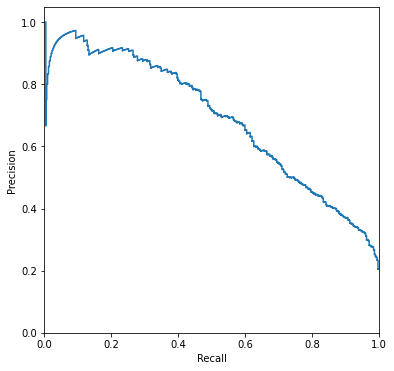

FPR [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.68896321e-04
 6.68896321e-04 6.68896321e-04 6.68896321e-04 1.33779264e-03
 1.33779264e-03 2.00668896e-03 2.00668896e-03 2.67558528e-03
 2.67558528e-03 3.34448161e-03 3.34448161e-03 4.01337793e-03
 4.01337793e-03 4.68227425e-03 4.68227425e-03 5.35117057e-03
 5.35117057e-03 6.02006689e-03 6.02006689e-03 6.68896321e-03
 6.68896321e-03 8.02675585e-03 8.02675585e-03 8.69565217e-03
 8.69565217e-03 1.00334448e-02 1.00334448e-02 1.07023411e-02
 1.07023411e-02 1.13712375e-02 1.13712375e-02 1.27090301e-02
 1.27090301e-02 1.40468227e-02 1.40468227e-02 1.47157191e-02
 1.47157191e-02 1.53846154e-02 1.53846154e-02 1.67224080e-02
 1.67224080e-02 1.80602007e-02 1.80602007e-02 1.87290970e-02
 1.87290970e-02 1.93979933e-02 1.93979933e-02 2.00668896e-02
 2.00668896e-02 2.20735786e-02 2.20735786e-02 2.34113712e-02
 2.34113712e-02 2.40802676e-02 2.40802676e-02 2.54180602e-02
 2.54180602e-02 2.60869565e-02 2.60869565e-02 2.67558528e-02
 2.67558528e-02 2.74

0

In [36]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 30, max_depth = 9)
print("Модель 3: Случайный лес с глубиной 9 и EST = 30")
model.fit(features_test, target_test) # обучим модель на тренировочной выборке
predictions_test = model.predict(features_test) 

f1_and_other_parameters_func(model, target_valid ,best_predictions, features_valid )

### Выводы:
* Самый большой показатель F1 у модели случайного леса (f1 = 0.62) при использовании увеличения размерности
* у модель логистической регресии и дерева решений показатель F1 ниже на тестовой выборке, чем на валидационной. У модели леса, наоборот на тестовой выборке показатель F1 больше. Это необычно
* 2/3 моделей смогли улучшить показатель F1>0.59. При этом Дерево решений работает быстрее, чем случайный лес поэтому будем использовать этот алгоритм
* не для всех моделей увеличение и снижение размерности улучшает показатель F1. Например, для случайного леса
* AUC-ROC показатель для всех ниже 0.32, что при диапазоне значений от 0 до 1 кажется низким значением

<div class="alert alert-block alert-info">
<b>Совет:</b> Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.
    


</div>



## 5 Чек-лист готовности проекта

 [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*